# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнила студентка группы БВТ2103 Пьянова Анна Олеговна
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена

### Выполнение:

Входные данные

In [2]:
with open('txt/matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
start = 7
end = 0

Вспомогательные методы

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy
from heapq import *
from math import inf

#восстановление пути из u в v
def get_path(P, u, v):
    Path = [v] 
    while v != u:
        v = P[v][u]
        Path.append(v)
    return Path

#превращение всех 0 матрицы в бесконечности
def toInf(M):
    for i in range(len(M)):
        for j in range(len(M)):
            if M[i][j] == 0:
                M[i][j] = inf 
    return M   
          
#построение графа по матрице
def showGraph(Matrix, path):
    G = nx.DiGraph(np.matrix(Matrix))
    color_map = []
    for node in G:
        if node in (path):
            color_map.append('red')
        else:
            color_map.append('green')
    pos = nx.planar_layout(G)
    nx.draw(G, pos, node_color=color_map, with_labels=True, arrows=True)
    edge_weight = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
    return plt.show()

Алгоритм Флойда-Уоршелла

[7, 6, 5, 4, 0]
Shortest distance from 7 to 0 = 7


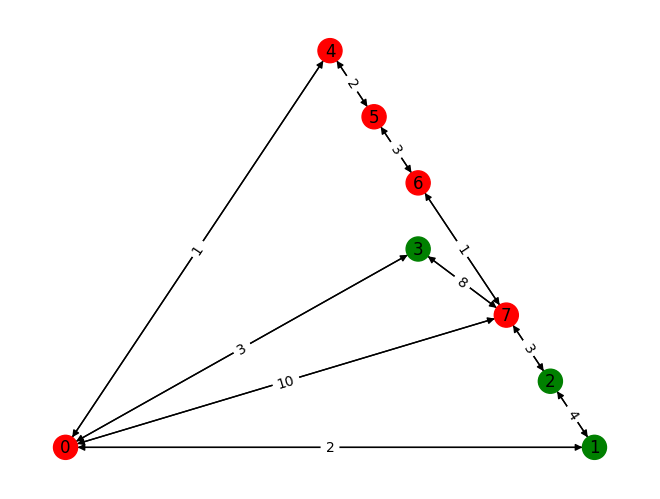

None


In [4]:
def Floyd(Matr, s, e):
    n = len(Matr)
    A = Matr 
    Prev = [[j for j in range(n)] for i in range(n)] 
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if A[i][k] < inf and A[k][j] < inf and A[i][k] + A[k][j] < A[i][j]:
                    A[i][j] = A[i][k] + A[k][j]
                    Prev[i][j] = k
    return (get_path(Prev, e, s), A[start][end])

p, d = Floyd(toInf(Matrix), start, end)
print(p)
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = '+ str(d))

with open('txt/matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix, p))


Вспомогательные методы

In [7]:
def minDistance(dist, visited):
  (minim, minVertex) = (inf, 0)
  for vertex in range(len(dist)):
    if minim > dist[vertex] and  visited[vertex] == False:
      (minim, minVertex) = (dist[vertex], vertex)
  return minVertex

#получение массива с информацией о рёбрах (соединяемые ребром вершины, его вес)
def getEdges(graph):
  edges = []
  for i in range(len(graph)):
      for j in range(len(graph[i])):
        if graph[i][j] != 0:
          edges.append([i, j, graph[i][j]])
  return edges

Алгоритм Дейкстры

[7, 6, 5, 4, 0]
Shortest distance from 7 to 0 = 7


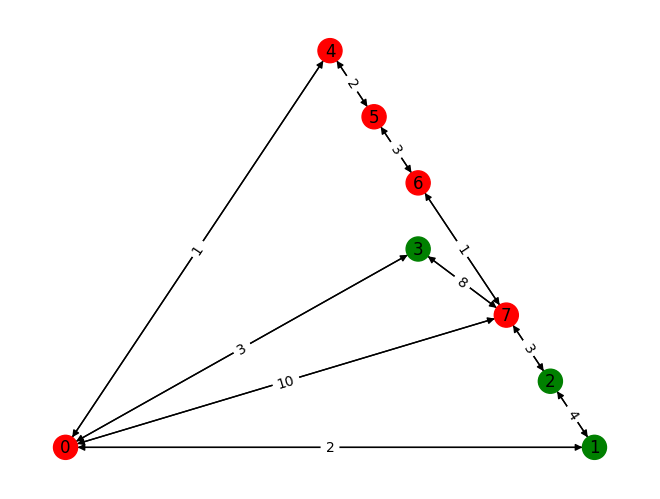

None


In [8]:
def Dijkstra(graph, modifiedGraph, src, end):
  N = len(graph)
  used = [False] * N
  dist = [inf] * N
  edges = [[]] * N
  dist[src] = 0

  for count in range(N):
    curVertex = minDistance(dist, used)
    used[curVertex] = True

    for vertex in range(N):
      if((used[vertex] == False) and (dist[vertex] > dist[curVertex] + modifiedGraph[curVertex][vertex])) and (graph[curVertex][vertex] != 0):
        dist[vertex] = (dist[curVertex] + modifiedGraph[curVertex][vertex])
        edges[vertex] = (copy.deepcopy(edges[curVertex] + [vertex]))

  return([src] + edges[end],dist)

p, d = Dijkstra(Matrix, Matrix, start, end)
print(p)
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = '+ str(d[end]))

with open('txt/matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix, p))


Вспомогательный метод

In [9]:
#восстановление пути из s в e
def get_path2(prev, s, e):
    path = []
    j = e
    while j != s:
        path.append(j)
        j = prev[j]
    path.append(s)
    path = path[::-1]
    return path

Алгоритм Беллмана-Форда

[7, 6, 5, 4, 0]
Shortest distance from 7 to 0 = 7


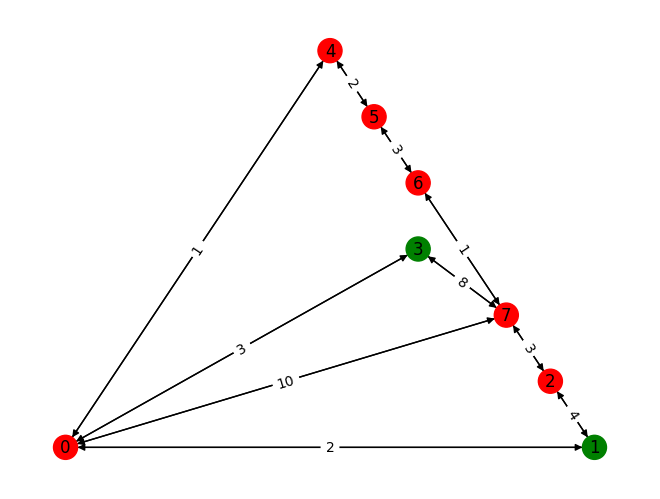

None


In [10]:
def BellmanFord(graph, start, forJohnson=False):
  n = len(graph)
  edges = getEdges(graph)
  
  if forJohnson == True:
    for i in range(len(graph)): 
      edges.append([len(graph), i, 0])
      n = n + 1

  dist = [inf] * n
  dist[start] = 0
  prev = [inf] * n
  prev[start] = 0

  for i in range(1, n):
    for(u, v, weight) in edges:
      if((dist[u] != inf) and (dist[u] + weight < dist[v])):
        dist[v] = dist[u] + weight
        prev[v] = u
     
  return prev, dist
 
p, d = BellmanFord(Matrix, start, end)  
print(get_path2(p, start, end))
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = '+ str(d[end]))

with open('txt/matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix, p))


Алгоритм Джонсона

[7, 6, 5, 4, 0]
Shortest distance from 7 to 0 = 7


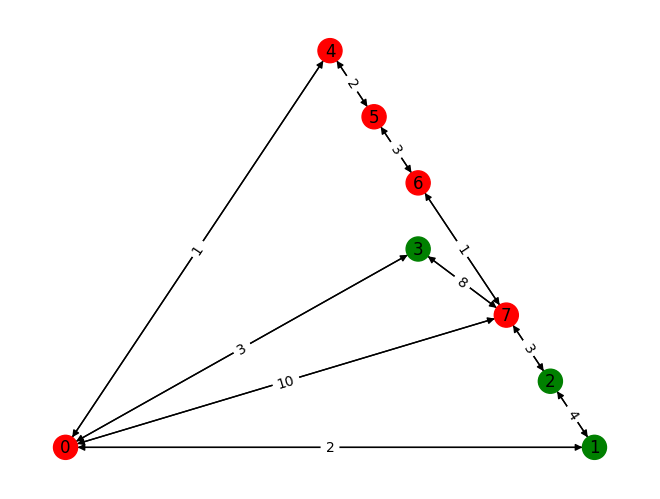

None


In [11]:
def Johnson(graph, src, end):
  size = len(graph)
  noP, modifyWeights = BellmanFord(graph, size, True)
  modifiedGraph = [[0 for x in range(len(graph))] for y in range(len(graph))]
  
  for i in range(len(graph)):
    for j in range(len(graph[i])):
      if graph[i][j] != 0:
        modifiedGraph[i][j] = (graph[i][j] + modifyWeights[i] - modifyWeights[j])
  return(Dijkstra(graph, modifiedGraph, src, end))

p, d = Johnson(Matrix, start, end)
print(p)
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = '+ str(d[end]))

with open('txt/matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix, p))


Вспомогательные методы

In [12]:
from collections import OrderedDict, defaultdict
from itertools import chain

class IndexedQueue(OrderedDict):
    
    def push(self, item):
        self[item] = None

    def pop(self):
        return OrderedDict.popitem(self, last=False)[0]

restore_path = lambda tup: (*restore_path(tup[1]),tup[0]) if tup else ()

#получение списка смежности
def getAdjacency(graph):
    edges = getEdges(graph)        
    adjacency = defaultdict(list)
    for u, v, w in edges:
        adjacency[u].append((v, w))
    return(adjacency)
    

Алгоритм Левита

(7, 6, 5, 4, 0)
Shortest distance from 7 to 0 = 7


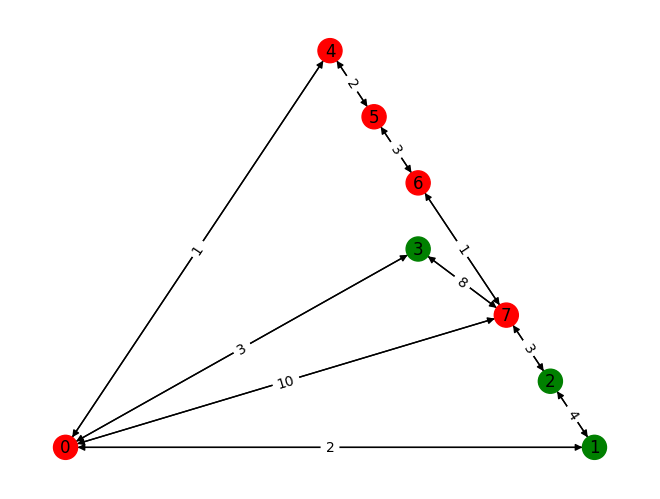

None


In [13]:
def Levit(graph, start, end=None):
  
    dist = defaultdict(lambda: inf)
    dist[start] = 0
    path = {start:(start,())}
    #расстояние до вершин вычислено
    m0 = set()
    #расстояние до вершин вычисляется
    m1 = IndexedQueue.fromkeys([start]) #основная очередь
    m1Urg = IndexedQueue() #срочная очередь
    #расстояние ещё не вычислено
    m2 = set(chain.from_iterable((v for v, _ in from_u) for from_u in graph.values())) - {start}
    
    def relax(u, v, w):
        if (dist[v] > dist[u] + w):
            dist[v] = dist[u] + w
            path[v] = (v, path[u])
            return True
        return False

    while m1 or m1Urg:
        u = m1Urg.pop() if m1Urg else m1.pop()
        for v, weight in graph.get(u, ()):
            if v in m2:
                m1.push(v)
                m2.discard(v)
                relax(u, v, weight)
            elif v in m1:
                relax(u, v, weight)
            elif v in m0 and relax(u, v, weight):
                m1Urg.push(v)
                m0.discard(v)
        m0.add(u)
    
    if end is None:
        return path, dist
    elif end in path:
        return restore_path(path[end]), dist[end]
    else:
        return inf, ()
                
with open("txt/matrix.txt","r") as f:
    Matrix = [[int(num) for num in line.split(' ')] for line in f]

p, d = Levit(getAdjacency(Matrix), start, end)
print(p)
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = '+ str(d))

with open('txt/matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix, p))


Алгоритм Йена

[7, 6, 5, 4, 0]
Shortest distance from 7 to 0 = 7


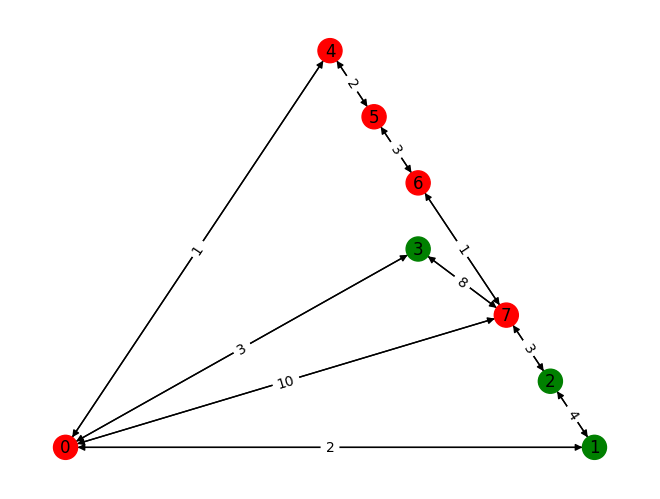

None


In [14]:
from operator import itemgetter

def Yen(matr, node_start, node_end):
    path, distances = Dijkstra(matr, matr, node_start, node_end)
    
    A = [{'dist': distances, 
          'path': path}]
    B = []
    
    if not A[0]['path']: 
        return A

    G = nx.Graph(np.matrix(matr))
    
    for k in range(1, len(matr)):
        for i in range(0, len(A[-1]['path']) - 1):
            node_spur = A[-1]['path'][i]
            path_root = A[-1]['path'][:i+1]
            
            edges_removed = []
            for path_k in A:
                cur_path = path_k['path']
                if len(cur_path) > i and path_root == cur_path[:i+1]:
                    cost = G.remove_edge(cur_path[i], cur_path[i+1])
                    edges_removed.append([cur_path[i], cur_path[i+1], cost])
            
            path_spur = Dijkstra(matr, matr, node_spur, node_end)
            
            if path_spur in path:
                path_total = path_root[:-1] + path_spur['path']
                dist_total = distances[node_spur] + path_spur['dist']
                potential_k = {'cost': dist_total, 'path': path_total}
            
                if not (potential_k in B):
                    B.append(potential_k)
            
            for edge in edges_removed:
                G.add_edge(edge[0], edge[1])
        
        if len(B):
            B = sorted(B, key=itemgetter('dist'))
            A.append(B[0])
            B.pop(0)
        else:
            break
    
    return A

res = Yen(Matrix, start, end)
p = res[0]['path']
d = res[0]['dist'][end]
print(p)
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = '+ str(d))

with open('txt/matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix, p))

Временная сложность алгоритмов

In [26]:
from tabulate import tabulate
import time

with open("txt/m3.txt","r") as f:
    Matrix = [[int(num) for num in line.split(' ')] for line in f]
start = 7
end = 0

start_time1 = time.time()
Floyd(toInf(Matrix), start, end)
t_f = format((time.time() - start_time1)*1000)
start_time2 = time.time()
Dijkstra(Matrix, Matrix, start, end)
t_d = format((time.time() - start_time2)*1000)
start_time3 = time.time()
BellmanFord(Matrix, start)
t_b = format((time.time() - start_time3)*1000)
start_time4 = time.time()
Johnson(Matrix, start, end)
t_j = format((time.time() - start_time4)*1000)
start_time5 = time.time()
Levit(getAdjacency(Matrix), start, end)
t_l = format((time.time() - start_time5)*1000)
start_time6 = time.time()
Yen(Matrix, start, end)
t_y = format((time.time() - start_time6)*1000)


data = [["Floyd-Warshall", "O(V^3)", t_f], 
        ["Dijkstra", "O(V^2)", t_d], 
        ["Bellman-Ford", "O(V*E)", t_b], 
        ["Johnson", "O(V^2*log(V)+V*E)", t_j],
        ["Levit", "O(V^2+E)", t_l],
        ["Yen", "O(kV(E+Vlog(V)))", t_y]]

col_names = ["Algorithm", "Complexity", "Time, matrix 30*30 (ms)"]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))
print("where V - number of vertices, E - number of edges")

╒════════════════╤═══════════════════╤═══════════════════════════╕
│ Algorithm      │ Complexity        │   Time, matrix 30*30 (ms) │
╞════════════════╪═══════════════════╪═══════════════════════════╡
│ Floyd-Warshall │ O(V^3)            │                  10.6461  │
├────────────────┼───────────────────┼───────────────────────────┤
│ Dijkstra       │ O(V^2)            │                   1.0345  │
├────────────────┼───────────────────┼───────────────────────────┤
│ Bellman-Ford   │ O(V*E)            │                   5.37062 │
├────────────────┼───────────────────┼───────────────────────────┤
│ Johnson        │ O(V^2*log(V)+V*E) │                  10.2823  │
├────────────────┼───────────────────┼───────────────────────────┤
│ Levit          │ O(V^2+E)          │                   1.56355 │
├────────────────┼───────────────────┼───────────────────────────┤
│ Yen            │ O(kV(E+Vlog(V)))  │                   2.92277 │
╘════════════════╧═══════════════════╧════════════════════════

### Вывод

В ходе выполнения лабораторной работы мы реализовали алгоритмы поиска кратчайшего расстояния между двумя вершинами графа, заданного матрицей смежности из текстового файла, разработали графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами, а также по результатам работы проанализировали временную сложность работы заданных алгоритмов в зависимости от числа узлов и ребер графа.